In [43]:
states=['recover','growth','stable','bubble','reform','now']
dates=["1949/5/16","1954/12/1",'1972/1/1',"1986/12/1","1993/11/1","2016/9/30"]
print(states)

['recover', 'growth', 'stable', 'bubble', 'reform', 'now']


In [44]:
print(dates)

['1949/5/16', '1954/12/1', '1972/1/1', '1986/12/1', '1993/11/1', '2016/9/30']


In [45]:
import pandas_datareader.data as web
import numpy as np
end='2018/12/30'
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16",end).NIKKEI225
print('rate of change')
for i in range(len(dates)-1):
    ave=n225[dates[i]:dates[i+1]].pct_change().mean()*250
    print(states[i],': %2.2f ％;'%(ave*100))
print 
print('volatility')
for i in range(len(dates)-1):
    vol=np.log(n225[dates[i]:dates[i+1]]).diff().std()*np.sqrt(250)
    print(states[i],': %2.2f ％;'%(vol*100))

rate of change
recover : 13.18 ％;
growth : 12.91 ％;
stable : 13.06 ％;
bubble : 3.30 ％;
reform : 2.03 ％;
volatility
recover : 22.99 ％;
growth : 14.45 ％;
stable : 12.64 ％;
bubble : 22.82 ％;
reform : 23.54 ％;


C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\672541439.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ave=n225[dates[i]:dates[i+1]].pct_change().mean()*250


日経平均株価と経済の構造変化

In [46]:
struct_break=[('1949/5/16','Post-war reconstruction'),
              ('1954/12/1','High economic growth period'),
              ('1972/1/1','Stable growth period'),
              ('1986/12/1','bubble'),
              ('1991/3/1','adjustment period'),
              ('2012/11/11','Abenomics')]

Text(0.5, 1.0, 'Nikkei 225 and structural change')

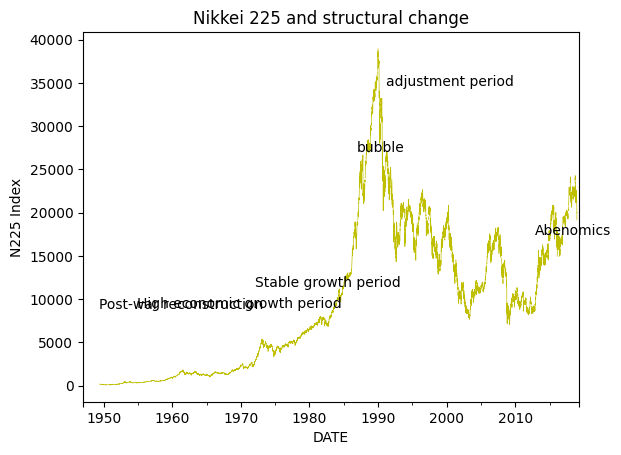

In [47]:

%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
g=fig.add_subplot(1,1,1)
n225.plot(ax=g,style='y-',linewidth=0.5)
plt.ylabel('N225 Index')
for date, label in struct_break:
    g.annotate(label,xy=(date, n225.asof(date)+1000),
        xytext=(date,n225.asof(date)+10000),
        horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2019/4/25'])

plt.title("Nikkei 225 and structural change")

対数表記

Text(0.5, 1.0, 'Log Nikkei 225 index and structural change')

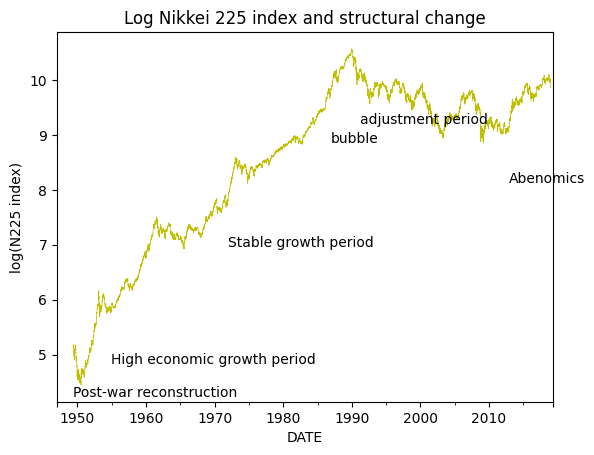

In [48]:
import numpy as np
fig=plt.figure()
g=fig.add_subplot(1,1,1)
ln_n225=np.log(n225)               #numpyのlogを利用
ln_n225.plot(ax=g,style='y-',linewidth=0.5)

for date, label in struct_break:
    g.annotate(label,xy=(date, ln_n225.asof(date)),
        xytext=(date,ln_n225.asof(date)-0.75),
        horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2019/4/25'])
plt.ylabel('log(N225 index)')
plt.title("Log Nikkei 225 index and structural change")

In [49]:
import pandas_datareader.data as pdr
import numpy as np
for i in range(len(dates)-1):
    vol=np.log(n225[dates[i]:dates[i+1]]).diff().std()
    print(states[i],': %2.4f ;'%vol,)

recover : 0.0145 ;
growth : 0.0091 ;
stable : 0.0080 ;
bubble : 0.0144 ;
reform : 0.0149 ;


In [50]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import yfinance as yf

[*********************100%***********************]  1 of 1 completed
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\2757965691.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.458279141965889' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\2757965691.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4810986610088577' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0


<Figure size 800x400 with 0 Axes>

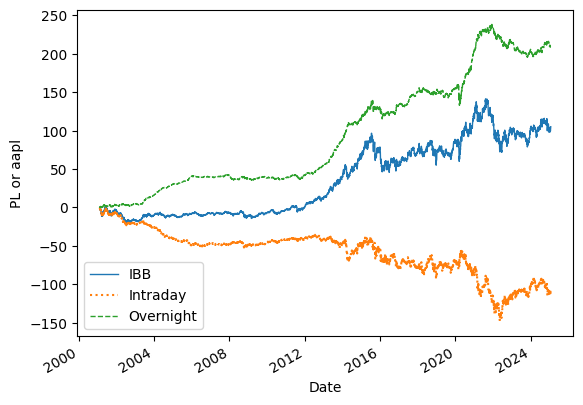

In [51]:

# Define start and end dates
end = datetime.datetime.now()
start = datetime.date(1980, 1, 1)

# Fetch data using yfinance
ticker = "IBB"  # Replace with your desired stock ticker
price = yf.download(ticker, start=start, end=end)

# Prepare for analysis
analysis = price.copy()
analysis['intraday'] = 0
analysis['overnight'] = 0

# Perform calculations for intraday and overnight changes
c0 = analysis['Close'].iloc[0]
for i in range(1, len(analysis)):
    o = analysis['Open'].iloc[i]
    c = analysis['Close'].iloc[i]
    analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
    analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0
    c0 = c

# Plot the data
plt.figure(figsize=(8, 4))
(analysis['Close'] - analysis['Close'].iloc[0]).plot(label='Close', linewidth=1)
analysis['intraday'].cumsum().plot(label="Intraday", linestyle=":")
analysis['overnight'].cumsum().plot(label="Overnight", linestyle='--', linewidth=1)

# Add labels and legend
plt.legend()
plt.ylabel('PL or aapl')
plt.legend(loc='lower left')
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\3678055604.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15699479135416183' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\3678055604.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01744559255697098' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0


<Figure size 800x400 with 0 Axes>

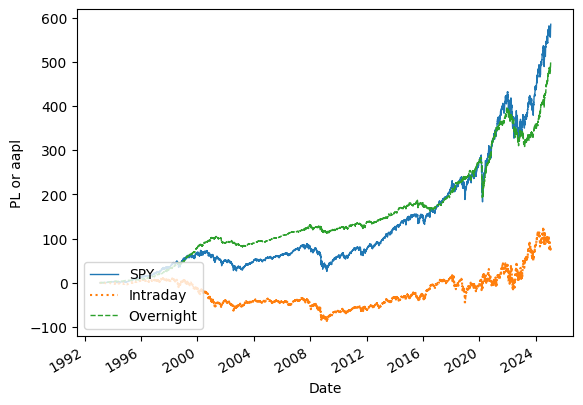

In [52]:

# Define start and end dates
end = datetime.datetime.now()
start = datetime.date(1980, 1, 1)

# Fetch data using yfinance
ticker = "SPY"  # Replace with your desired stock ticker
price = yf.download(ticker, start=start, end=end)

# Prepare for analysis
analysis = price.copy()
analysis['intraday'] = 0
analysis['overnight'] = 0

# Perform calculations for intraday and overnight changes
c0 = analysis['Close'].iloc[0]
for i in range(1, len(analysis)):
    o = analysis['Open'].iloc[i]
    c = analysis['Close'].iloc[i]
    analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
    analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0
    c0 = c

# Plot the data
plt.figure(figsize=(8, 4))
(analysis['Close'] - analysis['Close'].iloc[0]).plot(label='Close', linewidth=1)
analysis['intraday'].cumsum().plot(label="Intraday", linestyle=":")
analysis['overnight'].cumsum().plot(label="Overnight", linestyle='--', linewidth=1)

# Add labels and legend
plt.legend()
plt.ylabel('PL or aapl')
plt.legend(loc='lower left')
plt.show()


In [53]:
print(analysis[['intraday', 'overnight']].head(10))


Price       intraday overnight
Ticker                        
Date                          
1993-01-29  0.000000  0.000000
1993-02-01  0.156995  0.017446
1993-02-02  0.069775 -0.017442
1993-02-03  0.226770  0.034899
1993-02-04  0.017444  0.087216
1993-02-05  0.000000 -0.017447
1993-02-08  0.000000  0.000000
1993-02-09 -0.087219 -0.087221
1993-02-10  0.034888 -0.000006
1993-02-11  0.087219  0.034878


[*********************100%***********************]  1 of 1 completed
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\1599683239.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.14072260479522924' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\1599683239.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.40457692523406763' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0


<Figure size 800x400 with 0 Axes>

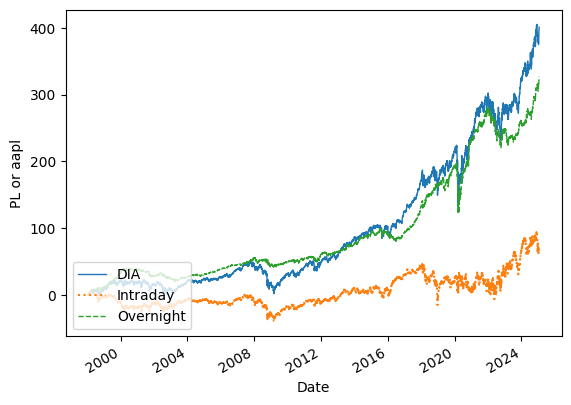

In [54]:

# Define start and end dates
end = datetime.datetime.now()
start = datetime.date(1980, 1, 1)

# Fetch data using yfinance
ticker = "DIA"  # Replace with your desired stock ticker
price = yf.download(ticker, start=start, end=end)

# Prepare for analysis
analysis = price.copy()
analysis['intraday'] = 0
analysis['overnight'] = 0

# Perform calculations for intraday and overnight changes
c0 = analysis['Close'].iloc[0]
for i in range(1, len(analysis)):
    o = analysis['Open'].iloc[i]
    c = analysis['Close'].iloc[i]
    analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
    analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0
    c0 = c

# Plot the data
plt.figure(figsize=(8, 4))
(analysis['Close'] - analysis['Close'].iloc[0]).plot(label='Close', linewidth=1)
analysis['intraday'].cumsum().plot(label="Intraday", linestyle=":")
analysis['overnight'].cumsum().plot(label="Overnight", linestyle='--', linewidth=1)

# Add labels and legend
plt.legend()
plt.ylabel('PL or aapl')
plt.legend(loc='lower left')
plt.show()


In [55]:
print(analysis[['intraday', 'overnight']].head(10))

Price       intraday overnight
Ticker                        
Date                          
1998-01-20  0.000000  0.000000
1998-01-21 -0.140723 -0.404577
1998-01-22  0.000000 -0.369396
1998-01-23 -0.281445  0.175912
1998-01-26 -0.035181  0.211061
1998-01-27  0.615661 -0.105563
1998-01-28  0.422168  0.087987
1998-01-29  0.193494 -0.035195
1998-01-30 -0.395782  0.299045
1998-02-02  0.219879  0.782715


[*********************100%***********************]  1 of 1 completed
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\149208981.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.106113568583595' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
C:\Users\20222305\AppData\Local\Temp\ipykernel_9436\149208981.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.31835950974570437' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0


<Figure size 800x400 with 0 Axes>

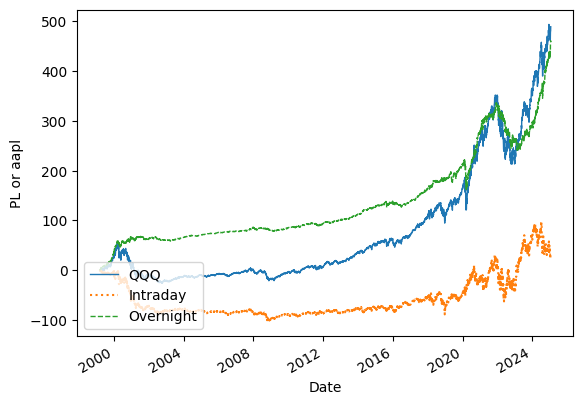

In [56]:

# Define start and end dates
end = datetime.datetime.now()
start = datetime.date(1980, 1, 1)

# Fetch data using yfinance
ticker = "QQQ"  # Replace with your desired stock ticker
price = yf.download(ticker, start=start, end=end)

# Prepare for analysis
analysis = price.copy()
analysis['intraday'] = 0
analysis['overnight'] = 0

# Perform calculations for intraday and overnight changes
c0 = analysis['Close'].iloc[0]
for i in range(1, len(analysis)):
    o = analysis['Open'].iloc[i]
    c = analysis['Close'].iloc[i]
    analysis.iloc[i, analysis.columns.get_loc('intraday')] = c - o
    analysis.iloc[i, analysis.columns.get_loc('overnight')] = o - c0
    c0 = c

# Plot the data
plt.figure(figsize=(8, 4))
(analysis['Close'] - analysis['Close'].iloc[0]).plot(label='Close', linewidth=1)
analysis['intraday'].cumsum().plot(label="Intraday", linestyle=":")
analysis['overnight'].cumsum().plot(label="Overnight", linestyle='--', linewidth=1)

# Add labels and legend
plt.legend()
plt.ylabel('PL or aapl')
plt.legend(loc='lower left')
plt.show()


In [57]:
print(analysis[['intraday', 'overnight']].head(10))

Price       intraday overnight
Ticker                        
Date                          
1999-03-10  0.000000  0.000000
1999-03-11 -0.106114  0.318360
1999-03-12 -0.901965 -0.159192
1999-03-15  0.901965  0.318360
1999-03-16  0.185699  0.185693
1999-03-17 -0.318341 -0.000007
1999-03-18  0.901965 -0.053050
1999-03-19 -1.724346  0.583645
1999-03-22 -0.716266  0.185669
1999-03-23 -1.273363 -0.238737
